<a href="https://colab.research.google.com/github/Musaddiq98/Data-Science-Assignments/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction model for profit of 50_startups data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [12]:
pt=pd.read_csv('50_Startups.csv')

In [13]:
pt.shape

(50, 5)

In [14]:
pt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
# EDA

In [16]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
pt[pt.duplicated()]
# no data is duplicated

,R&D Spend,Administration,Marketing Spend,State,Profit


In [18]:
#corerlation analysis
# correlation matrix
pt.corr()

<ipython-input-18-c63e7539ef63>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pt.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


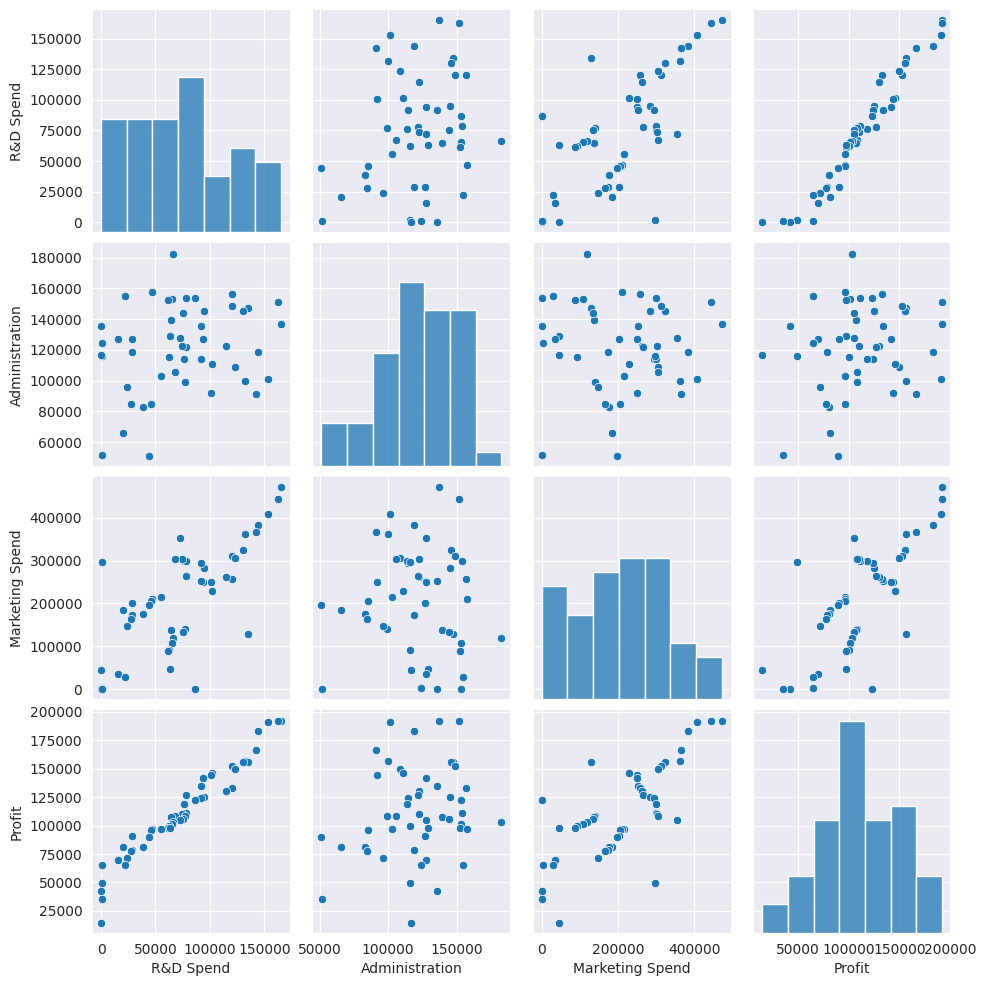

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(pt)

In [20]:
#model building
model1 = smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=pt).fit()

PatsyError: ignored

In [ ]:
model1.params

In [ ]:
model1.summary()

In [ ]:
# the administration is insignificant and hence ,
#individual linear regression models is created for Administration and Marketing spend


In [ ]:
# SLR for Administration
slr_a = smf.ols('Profit~Administration',data=pt).fit()

In [ ]:
slr_a.summary()
# Administartion is insignificant

In [ ]:
slr_m = smf.ols('Profit~MarketingSpend',data=pt).fit()

In [ ]:
slr_m.summary()
# marketing spend has significant value

In [ ]:
mlr_am=smf.ols('Profit~Administration+MarketingSpend',data=pt).fit()

In [ ]:
mlr_am.summary()
# both Administration and Markting spend has significant values
# but the R-squared:	0.610

In [ ]:
# validating model
# two techniques  1.VIF   2. Residual analysis
#1.Vif
rsq_Administration = smf.ols('Administration~RnDSpend+MarketingSpend',data=pt).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_RnDSpend = smf.ols('RnDSpend~Administration+MarketingSpend',data=pt).fit().rsquared
vif_RnDSpend = 1/(1-rsq_RnDSpend)

rsq_MarketingSpend = smf.ols('MarketingSpend~RnDSpend+Administration',data=pt).fit().rsquared
vif_MarketingSpend = 1/(1-rsq_MarketingSpend)

# Storing vif values in a data frame
d1 = {'Variables':['Administration','RnDSpend','MarketingSpend'],'VIF':[vif_Administration,vif_RnDSpend,vif_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

In [ ]:
# all the VIF values are less than 20 and hence all the variables are taken into consideration

In [ ]:
## 2. Residual analysis
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model.resid,line='q') # line ='q'  is the 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-20000))
# the index no 49 is to be taken into consideration

In [ ]:
#Residual Plot for Homoscedasticity or hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # ei vs fitted values

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
# no pattern and hence no problems

In [ ]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnDSpend", fig=fig)
plt.show()

In [ ]:
#model deletion diagonistics
#detection of outliers/influencres
#cooks distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(pt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

In [ ]:
#high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = pt.shape[1]
n = pt.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


In [ ]:
#from the above plot it is evident that the value 49 is the influencer
pt[pt.index.isin([49])]

In [ ]:
#imporoving the model
pt_new=pd.read_csv('50_Startups.csv')

In [ ]:
pt_new.head()

In [ ]:
pt1=pt_new.drop(pt_new.index[[49]],axis=0).reset_index()

In [ ]:
#Drop the original index
pt1=pt1.drop(['index'],axis=1)

In [ ]:
pt1

In [ ]:
#model building
model2 = smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=pt1).fit()

In [ ]:
model2.summary()

In [ ]:
#final model is model2
(model2.rsquared,model2.aic)

In [ ]:
#model predictions
#x=input("enter the R&D spend:")
#y=input("enter the Administration spend :")
#z=input("enter the Marketing spend:")
new_data=pd.DataFrame({'RnDSpend':150000,'Administration':100000,'MarketingSpend':400000},index=[1])
new_data

In [ ]:
model2.predict(new_data)

In [ ]:
model2.predict(pt1.iloc[0:5,])